# The Wonderful World of Julia

Lets us start with a very high level view of some of the things Julia can do. Even though it is a young language, you can still do a lot with it already, using Julia and its packages. 

The Julia Set
---------------

In [1]:
function julia(z, c; maxiter=200)
    for n = 1:maxiter
        if abs2(z) > 4
            return n-1
        end
        z = z*z + c
    end
    return maxiter
end

julia (generic function with 1 method)

In [7]:
m = [ uint8(julia(complex(r,i), complex(-.06,.67); maxiter=100)) for i=1:-.002:-1, r=-1.5:.002:1.5 ];

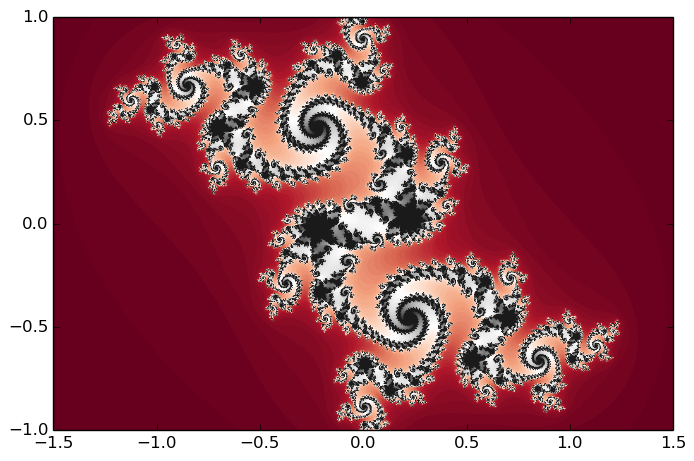

PyObject <matplotlib.image.AxesImage object at 0x8be5bc2c>

In [8]:
using PyPlot
imshow(m, cmap="RdGy", extent=[-1.5,1.5,-1,1])

###Statistics

In [15]:
using StatsBase
a=rand(4300);
(mean(a), var(a), skewness(a))

(0.5015999946700418,0.08468222474758787,-0.005533715435347856)

In [16]:
quantile(a)

5-element Array{Float64,1}:
 0.000130355
 0.251655   
 0.505299   
 0.758733   
 0.999819   

In [17]:
cov(a * a')

4300x4300 Array{Float64,2}:
 0.0267035   0.00969803  0.0292615   …  0.0408845   0.0299699   0.0133078 
 0.00969803  0.00352207  0.010627       0.0148482   0.0108843   0.00483305
 0.0292615   0.010627    0.0320644      0.0448008   0.0328407   0.0145826 
 0.00476026  0.0017288   0.00521625     0.00728821  0.00534253  0.00237229
 0.0123673   0.0044915   0.013552       0.018935    0.0138801   0.00616331
 0.0221722   0.00805238  0.0242961   …  0.0339468   0.0248843   0.0110496 
 0.0406313   0.0147562   0.0445233      0.0622086   0.0456012   0.0202487 
 0.00974984  0.00354089  0.0106838      0.0149275   0.0109424   0.00485887
 0.0149837   0.00544169  0.016419       0.0229408   0.0168165   0.00746718
 0.00636083  0.00231009  0.00697013     0.00973876  0.00713888  0.00316994
 0.0418044   0.0151823   0.0458088   …  0.0640047   0.0469178   0.0208334 
 0.00298723  0.00108488  0.00327337     0.0045736   0.00335262  0.0014887 
 0.0145989   0.00530194  0.0159973      0.0223517   0.0163846   0.007275

In [19]:
using HypothesisTests
OneSampleTTest(a, 0.5)

LoadError: LoadError: ArgumentError: HypothesisTests not found in path
while loading In[19], in expression starting on line 1

In [10]:
using Distributions

W=Weibull(2,1)

Weibull(α=2.0, θ=1.0)

In [11]:
rand(W)

1.3829142696927068

###Integration

A pure julia numerical integration routine is buit in.

In [20]:
quadgk(x->sin(x), 0,pi)

(2.0,1.7905676941154525e-12)

For greater accuracy, use the *Cubature* package

In [13]:
using Cubature
hquadrature(x->sin(x), 0,pi)

(2.0,2.220446049250313e-14)

###Plotting with Matplotlib

Matplotlib is an open source python library with an API similar to Matlab's plotting commands. It is available in Julia as the PyPlot package. 

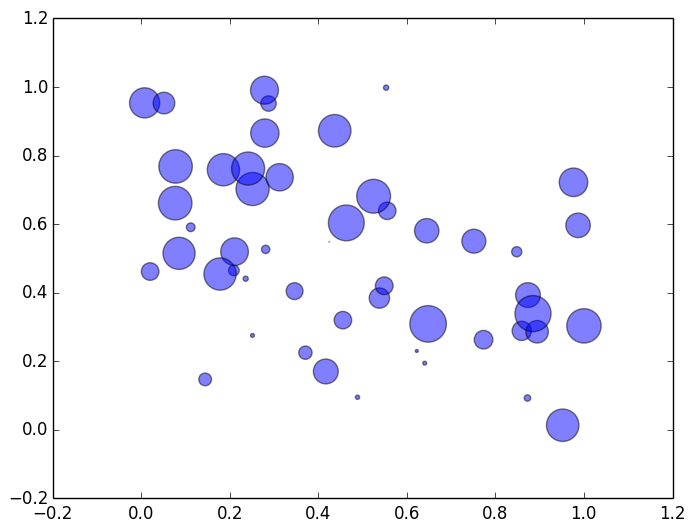

PyObject <matplotlib.collections.PathCollection object at 0x1062f71d0>

In [14]:
using PyPlot
srand(1)

x=rand(50)
y=rand(50)
area=pi.*(15.*rand(50)).^2
# 0 to 15 point radiuses
scatter(x, y, s=area, alpha=0.5)

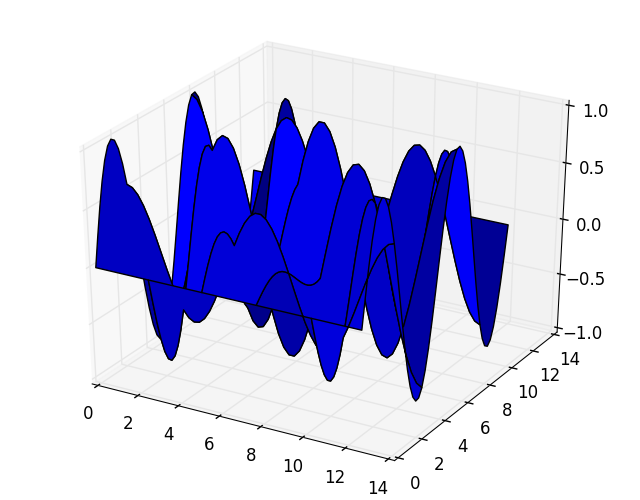

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x115b00910>

In [15]:
y = linspace(0,4π,50)
surf(y, y, sin(y) .* cos(y)')

There are other options for plotting. These include Gadfly and Winston, which are pure Julia, and Gaston, which is a wrapper around GNUPlot. 

###Optimisation: Linear Programming

Solves a simple knapsack problem:
``` 
  max sum(p_j x_j)
  st sum(w_j x_j) <= C
  x binary
 ```

In [18]:
using JuMP

m = Model(solver=Gurobi)
@defVar(m, x[1:5], Bin)
profit = [ 5, 3, 2, 7, 4 ]
weight = [ 2, 8, 4, 2, 5 ]
capacity = 10

# Objective: maximize profit
@setObjective(m, Max, dot(profit, x))

# Constraint: can carry all
@addConstraint(m, dot(weight, x) <= capacity)

# Solve problem using MIP solver
status = solve(m)

println("Objective is: ", getObjectiveValue(m))
println("Solution is:")
for i = 1:5
    print("x[$i] = ", getValue(x[i]))
    println(", p[$i]/w[$i] = ", profit[i]/weight[i])
end

Objective is: 16.0
Solution is:
x[1] = 1.0, p[1]/w[1] = 2.5
x[2] = 0.0, p[2]/w[2] = 0.375
x[3] = 0.0, p[3]/w[3] = 0.5
x[4] = 1.0, p[4]/w[4] = 3.5
x[5] = 1.0, p[5]/w[5] = 0.8


###Interactive Widgets

In [21]:
ex = :( x^5 + 5 * x - 5 )
dump(ex,7)

Expr 
  head: Symbol call
  args: Array(Any,(3,))
    1: Symbol -
    2: Expr 
      head: Symbol call
      args: Array(Any,(3,))
        1: Symbol +
        2: Expr 
          head: Symbol call
          args: Array(Any,(3,))
            1: Symbol ^
            2: Symbol x
            3: Int64 5
          typ: Any
        3: Expr 
          head: Symbol call
          args: Array(Any,(3,))
            1: Symbol *
            2: Int64 5
            3: Symbol x
          typ: Any
      typ: Any
    3: Int64 5
  typ: Any


In [23]:
using Interact
using SymPy
x = Sym("x")
@manipulate for n=0:10
    latex(SymPy.diff(sin(x^2), x, n))
end

INFO: Precompiling module SymPy...
  likely near /home/jayant/.julia/v0.4/Requires/src/getthing.jl:44
  likely near /home/jayant/.julia/v0.4/Requires/src/getthing.jl:44
  likely near /home/jayant/.julia/v0.4/Requires/src/getthing.jl:49
  likely near /home/jayant/.julia/v0.4/Requires/src/getthing.jl:49
  likely near /home/jayant/.julia/v0.4/Requires/src/getthing.jl:52
  likely near /home/jayant/.julia/v0.4/Requires/src/getthing.jl:53
  likely near /home/jayant/.julia/v0.4/Requires/src/require.jl:32
INFO: Recompiling stale cache file /home/jayant/.julia/lib/v0.4/SymPy.ji for module SymPy.


LoadError: LoadError: __precompile__(true) but require failed to create a precompiled cache file
while loading In[23], in expression starting on line 2